In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import time, timedelta
from matplotlib.ticker import FuncFormatter, LinearLocator
import json

SECONDS_IN_A_DAY = 60 * 60 * 24
get_time = lambda x: time(hour=(hours := x // 3600), minute=(x - (hours * 3600)) // 60, second=x % 60)


plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": "\\usepackage[OT4]{polski} \\usepackage[T1]{fontenc} \\usepackage{tgtermes}",
})

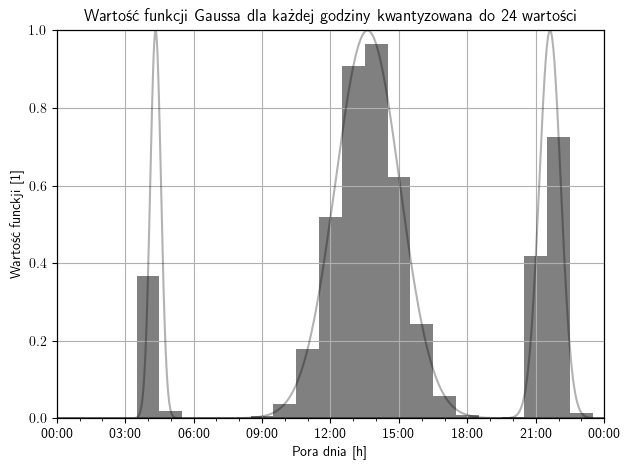

In [2]:
time_space = np.linspace(0, 1, 24, False)
bell_space = np.linspace(0, 1, 1000, False)

@FuncFormatter
def get_time_format(x, pos):
    return get_time(math.floor((x * SECONDS_IN_A_DAY) % SECONDS_IN_A_DAY)).strftime("%H:%M")

fig, ax1 = plt.subplots()
ax1.set_xlim(0, 1)
ax2 = ax1.twiny()
ax2.set_xlim(0, 1000)
ax2.set_xticks([])

ax1.set_xticks(np.linspace(0, 1, 9))
ax1.xaxis.set_major_formatter(get_time_format)
ax1.xaxis.set_minor_locator(LinearLocator(25))
ax1.set_ylim(0, 1)

ax1.grid()

x_time_1 = time(21, 37, 21)
x_time_2 = time(13, 37, 21)
x_time_3 = time(4, 20, 2)

seconds_1 = timedelta(hours=x_time_1.hour, minutes=x_time_1.minute, seconds=x_time_1.second).total_seconds() / SECONDS_IN_A_DAY
seconds_2 = timedelta(hours=x_time_2.hour, minutes=x_time_2.minute, seconds=x_time_2.second).total_seconds() / SECONDS_IN_A_DAY
seconds_3 = timedelta(hours=x_time_3.hour, minutes=x_time_3.minute, seconds=x_time_3.second).total_seconds() / SECONDS_IN_A_DAY

ax1.bar(time_space, np.exp(-np.abs((seconds_1 - time_space) * 36) ** 2), width=1/24, color="grey")
ax2.plot(np.exp(-np.abs((seconds_1 - bell_space) * 36) ** 2), color="black", alpha=0.3)

ax1.bar(time_space, np.exp(-np.abs((seconds_2 - time_space) * 12) ** 2), width=1/24, color="grey")
ax2.plot(np.exp(-np.abs((seconds_2 - bell_space) * 12) ** 2), color="black", alpha=0.3)

ax1.bar(time_space, np.exp(-np.abs((seconds_3 - time_space) * 72) ** 2), width=1/24, color="grey")
ax2.plot(np.exp(-np.abs((seconds_3 - bell_space) * 72) ** 2), color="black", alpha=0.3)
# ax1.vlines([seconds], [0], [1], colors=["black"], alpha=0.3)

ax1.set_xlabel("Pora dnia [h]")
ax1.set_ylabel("Wartość funckji [1]")
ax1.set_title("Wartość funkcji Gaussa dla każdej godziny kwantyzowana do 24 wartości")

plt.tight_layout()
plt.savefig("../thesis/img/time_param.pdf", bbox_inches="tight")

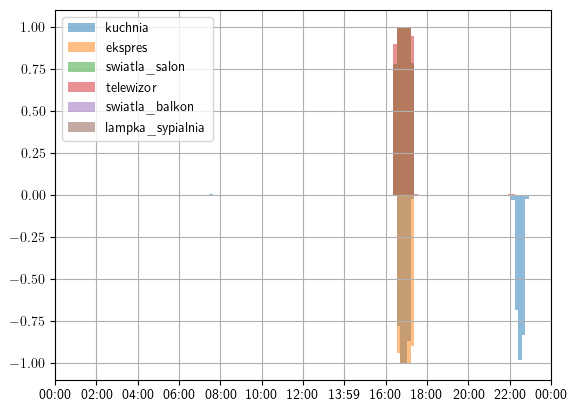

In [3]:
with open(f"../asd.json", "rt") as file:
    data = json.load(file)
fig, ax1 = plt.subplots()
for i, (device, history) in enumerate(data.items()):
    ax1.bar(np.linspace(0, 1, 144), history, 1/144, alpha=0.5, label=device)

ax1.set_xlim(0, 1)
ax1.legend()
ax1.set_xticks(np.linspace(0, 1, 13))
ax1.xaxis.set_major_formatter(get_time_format)
ax1.xaxis.set_minor_locator(LinearLocator(13))
ax1.grid()
fig.savefig("../thesis/img/swiatla_balkon.png", transparent=True, bbox_inches="tight")

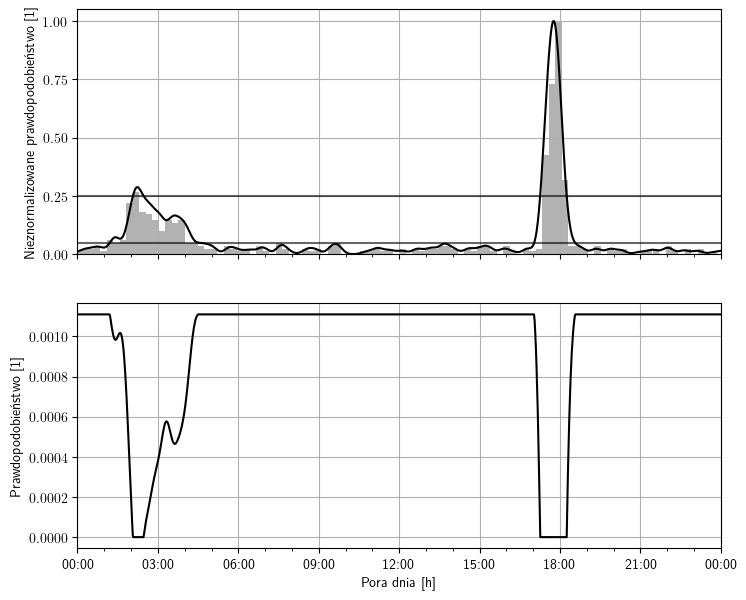

In [12]:
np.random.seed(0x2137)
WIDTH = 0.0075
CLIP_AT = (0.75, 0.95)
# time_range += 1 / (width * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((_range - location) / width) ** 2)

actions = np.concatenate((np.random.normal(0.74, 0.01, 200), np.random.normal(0.12, 0.04, 135), np.random.normal(0.5, 0.5, 200)))
X = np.linspace(0, 1, 1024)
Y = np.zeros_like(X)

for action in actions:
    Y += 1 / (WIDTH * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((X - action) / WIDTH) ** 2)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 7), sharex=True)
ax1.set_xticks(np.linspace(0, 1, 9))
ax1.xaxis.set_major_formatter(get_time_format)
ax1.xaxis.set_minor_locator(LinearLocator(25))
ax1.set_xlim(0, 1)

hist, _ = np.histogram(actions, 100, range=(0, 1))
hist = hist.astype(float)
hist /= hist.max()
Y /= Y.max()

ax1.set_yticks(np.linspace(0, 1, 5))
ax1.plot(X, Y, color="black")
Y = Y.max() - Y
ax1.bar(np.linspace(0, 1, 100), hist, 1/100, color="black", alpha=0.3)
ax1.set_ylabel("Nieznormalizowane prawdopodobieństwo [1]")
# ax1.set_xlabel("Pora dnia [h]")

ax1.grid()
ax1.hlines([1 - CLIP_AT[0], 1 - CLIP_AT[1]], [0, 0], [1, 1], color="black", alpha=0.6)
ax1.set_ylim(0, ax1.get_ylim()[1])

y_ = np.clip(Y, *CLIP_AT)
y_ -= y_.min()
ax2.plot(X, y_ / y_.sum(), color="black")
ax2.set_xticks(np.linspace(0, 1, 9))
ax2.xaxis.set_major_formatter(get_time_format)
ax2.xaxis.set_minor_locator(LinearLocator(25))
ax2.set_xlim(0, 1)
ax2.grid()

ax2.set_xlabel("Pora dnia [h]")
ax2.set_ylabel("Prawdopodobieństwo [1]")

plt.savefig("../thesis/img/transformation.pdf", bbox_inches="tight")